In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [5]:
test.head()

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238


In [6]:
train_X = train.iloc[:,4:]
train_Y = train.iloc[:,0:4]
test_X = test.iloc[:,1:]

In [7]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.3, random_state=42)

In [9]:
valid_X.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
507466,0.374564,0.399940,0.433621,0.459866,0.472699,0.506335,0.507750,0.521975,0.533085,0.524141,...,0.559102,0.601892,0.645260,0.666463,0.686821,0.688790,0.693385,0.699150,0.688804,0.687256
703664,0.310897,0.244671,0.206002,0.177038,0.129345,0.090063,0.070579,0.057348,0.060172,0.068039,...,0.445678,0.455155,0.502311,0.556557,0.600518,0.651768,0.681828,0.713912,0.709399,0.729241
263823,0.335130,0.350356,0.346621,0.374700,0.371109,0.368576,0.385600,0.386184,0.385721,0.414943,...,0.868834,0.890896,0.879207,0.874428,0.857481,0.865239,0.852211,0.847266,0.834733,0.835734
175764,0.281411,0.271408,0.244176,0.194823,0.186489,0.144125,0.127492,0.120126,0.104159,0.097994,...,0.665061,0.700276,0.701411,0.731375,0.742891,0.770059,0.773033,0.766907,0.798111,0.802930
203528,0.379820,0.389189,0.426292,0.439232,0.473112,0.485637,0.484676,0.525790,0.531499,0.546377,...,0.552563,0.576524,0.616268,0.633502,0.661194,0.675700,0.693648,0.696290,0.719072,0.737203


## plain DNN (3 hidden layers)

In [10]:
#케라스를 통해 모델 생성을 시작합니다.
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=226))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=160, activation='relu'))
model.add(Dense(units=4, activation='linear'))

Using TensorFlow backend.


In [11]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [16]:
mod=model.fit(train_X, train_Y, validation_data=(valid_X, valid_Y), epochs=50, batch_size=10000)

Train on 567000 samples, validate on 243000 samples
Epoch 1/50
567000/567000 [==============================] - 19s 33us/step - loss: 50.4072 - mae: 50.4072 - val_loss: 50.2435 - val_mae: 50.2435
Epoch 2/50
567000/567000 [==============================] - 16s 28us/step - loss: 49.8918 - mae: 49.8918 - val_loss: 49.6706 - val_mae: 49.6706
Epoch 3/50
567000/567000 [==============================] - 14s 24us/step - loss: 49.4757 - mae: 49.4757 - val_loss: 49.2227 - val_mae: 49.2227
Epoch 4/50
567000/567000 [==============================] - 13s 23us/step - loss: 48.9695 - mae: 48.9695 - val_loss: 48.7710 - val_mae: 48.7710
Epoch 5/50
567000/567000 [==============================] - 15s 26us/step - loss: 48.5033 - mae: 48.5033 - val_loss: 48.5138 - val_mae: 48.5138
Epoch 6/50
567000/567000 [==============================] - 14s 24us/step - loss: 48.0376 - mae: 48.0376 - val_loss: 47.8956 - val_mae: 47.8956
Epoch 7/50
567000/567000 [==============================] - 13s 24us/step - loss: 47

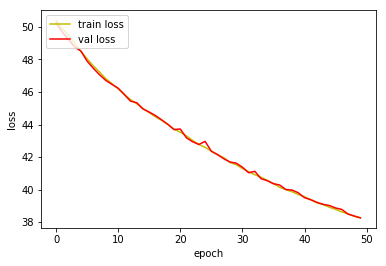

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(mod.history['loss'], 'y', label='train loss')
loss_ax.plot(mod.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

## With batch normalization

In [20]:
from keras.layers import BatchNormalization
from keras.layers import Activation

model = Sequential()
model.add(Dense(units=160, input_dim=226))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=160))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=160))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=4, activation='linear'))

In [21]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [23]:
mod=model.fit(train_X, train_Y, epochs=50, batch_size=10000, validation_split=0.1)

Train on 510300 samples, validate on 56700 samples
Epoch 1/50
510300/510300 [==============================] - 76s 149us/step - loss: 152.5041 - mae: 152.5041 - val_loss: 153.7751 - val_mae: 153.7751
Epoch 2/50
510300/510300 [==============================] - 22s 42us/step - loss: 147.5330 - mae: 147.5330 - val_loss: 149.4398 - val_mae: 149.4398
Epoch 3/50
510300/510300 [==============================] - 21s 42us/step - loss: 141.0446 - mae: 141.0446 - val_loss: 136.5448 - val_mae: 136.5448
Epoch 4/50
510300/510300 [==============================] - 22s 42us/step - loss: 132.7100 - mae: 132.7100 - val_loss: 127.1441 - val_mae: 127.1441
Epoch 5/50
510300/510300 [==============================] - 21s 41us/step - loss: 122.5784 - mae: 122.5784 - val_loss: 120.6356 - val_mae: 120.6356
Epoch 6/50
510300/510300 [==============================] - 22s 42us/step - loss: 111.1736 - mae: 111.1736 - val_loss: 129.9176 - val_mae: 129.9176
Epoch 7/50
510300/510300 [==============================] - 

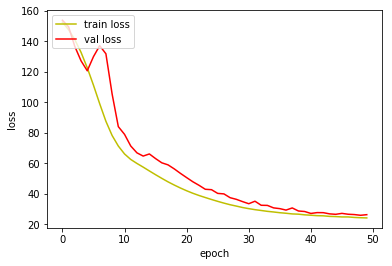

In [24]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(mod.history['loss'], 'y', label='train loss')
loss_ax.plot(mod.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

## With BN + He initialization

In [33]:
from keras.layers import BatchNormalization
from keras.layers import Activation

model = Sequential()
model.add(Dense(units=160, input_dim=226, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=160, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=160, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=160, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=4, kernel_initializer='he_normal', activation='linear'))

In [34]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [35]:
mod=model.fit(train_X, train_Y, epochs=500, batch_size=10000, validation_split=0.1)

Train on 510300 samples, validate on 56700 samples
Epoch 1/500
510300/510300 [==============================] - 108s 211us/step - loss: 153.1786 - mae: 153.1786 - val_loss: 153.3423 - val_mae: 153.3423
Epoch 2/500
510300/510300 [==============================] - 31s 61us/step - loss: 148.4265 - mae: 148.4265 - val_loss: 148.8255 - val_mae: 148.8255
Epoch 3/500
510300/510300 [==============================] - 29s 56us/step - loss: 141.9523 - mae: 141.9523 - val_loss: 137.1155 - val_mae: 137.1155
Epoch 4/500
510300/510300 [==============================] - 27s 54us/step - loss: 133.6224 - mae: 133.6224 - val_loss: 122.6756 - val_mae: 122.6756
Epoch 5/500
510300/510300 [==============================] - 29s 57us/step - loss: 123.5793 - mae: 123.5793 - val_loss: 113.4709 - val_mae: 113.4709
Epoch 6/500
510300/510300 [==============================] - 31s 61us/step - loss: 112.0261 - mae: 112.0261 - val_loss: 121.0198 - val_mae: 121.0198
Epoch 7/500
510300/510300 [==========================

510300/510300 [==============================] - 25s 49us/step - loss: 17.8696 - mae: 17.8696 - val_loss: 19.3536 - val_mae: 19.3536
Epoch 57/500
510300/510300 [==============================] - 25s 49us/step - loss: 17.8106 - mae: 17.8106 - val_loss: 19.0140 - val_mae: 19.0140
Epoch 58/500
510300/510300 [==============================] - 25s 50us/step - loss: 17.6103 - mae: 17.6103 - val_loss: 19.0181 - val_mae: 19.0181
Epoch 59/500
510300/510300 [==============================] - 25s 49us/step - loss: 17.5248 - mae: 17.5248 - val_loss: 18.9584 - val_mae: 18.9584
Epoch 60/500
510300/510300 [==============================] - 25s 49us/step - loss: 17.4297 - mae: 17.4297 - val_loss: 18.8791 - val_mae: 18.8791
Epoch 61/500
510300/510300 [==============================] - 25s 49us/step - loss: 17.2469 - mae: 17.2469 - val_loss: 18.1871 - val_mae: 18.1871
Epoch 62/500
510300/510300 [==============================] - 25s 49us/step - loss: 17.1503 - mae: 17.1503 - val_loss: 18.8141 - val_mae:

510300/510300 [==============================] - 25s 48us/step - loss: 13.8263 - mae: 13.8263 - val_loss: 15.0423 - val_mae: 15.0423
Epoch 113/500
510300/510300 [==============================] - 25s 48us/step - loss: 13.7616 - mae: 13.7616 - val_loss: 15.0596 - val_mae: 15.0596
Epoch 114/500
510300/510300 [==============================] - 25s 48us/step - loss: 13.7629 - mae: 13.7629 - val_loss: 15.1422 - val_mae: 15.1422
Epoch 115/500
510300/510300 [==============================] - 25s 49us/step - loss: 13.7135 - mae: 13.7135 - val_loss: 14.7509 - val_mae: 14.7509
Epoch 116/500
510300/510300 [==============================] - 25s 48us/step - loss: 13.6137 - mae: 13.6137 - val_loss: 14.9623 - val_mae: 14.9623
Epoch 117/500
510300/510300 [==============================] - 25s 48us/step - loss: 13.5955 - mae: 13.5955 - val_loss: 14.8377 - val_mae: 14.8377
Epoch 118/500
510300/510300 [==============================] - 25s 48us/step - loss: 13.6224 - mae: 13.6224 - val_loss: 14.8673 - va

Epoch 168/500
510300/510300 [==============================] - 25s 48us/step - loss: 12.0111 - mae: 12.0111 - val_loss: 13.3477 - val_mae: 13.3477
Epoch 169/500
510300/510300 [==============================] - 25s 48us/step - loss: 11.9615 - mae: 11.9615 - val_loss: 13.0942 - val_mae: 13.0942
Epoch 170/500
510300/510300 [==============================] - 25s 49us/step - loss: 11.8628 - mae: 11.8628 - val_loss: 13.1181 - val_mae: 13.1181
Epoch 171/500
510300/510300 [==============================] - 25s 49us/step - loss: 11.8508 - mae: 11.8508 - val_loss: 12.7127 - val_mae: 12.7127
Epoch 172/500
510300/510300 [==============================] - 25s 49us/step - loss: 11.8127 - mae: 11.8127 - val_loss: 13.1953 - val_mae: 13.1953
Epoch 173/500
510300/510300 [==============================] - 25s 50us/step - loss: 11.9288 - mae: 11.9288 - val_loss: 13.0326 - val_mae: 13.0326
Epoch 174/500
510300/510300 [==============================] - 27s 52us/step - loss: 11.8370 - mae: 11.8370 - val_loss

Epoch 224/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.7810 - mae: 10.7810 - val_loss: 11.9731 - val_mae: 11.9731
Epoch 225/500
510300/510300 [==============================] - 25s 49us/step - loss: 10.8350 - mae: 10.8350 - val_loss: 11.7641 - val_mae: 11.7641
Epoch 226/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.7459 - mae: 10.7459 - val_loss: 12.2571 - val_mae: 12.2571
Epoch 227/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.8275 - mae: 10.8275 - val_loss: 12.1486 - val_mae: 12.1486
Epoch 228/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.8600 - mae: 10.8600 - val_loss: 12.0559 - val_mae: 12.0559
Epoch 229/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.7504 - mae: 10.7504 - val_loss: 11.7902 - val_mae: 11.7902
Epoch 230/500
510300/510300 [==============================] - 25s 49us/step - loss: 10.7494 - mae: 10.7494 - val_loss

Epoch 280/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.9769 - mae: 9.9769 - val_loss: 11.4299 - val_mae: 11.4299
Epoch 281/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.0718 - mae: 10.0718 - val_loss: 11.1346 - val_mae: 11.1346
Epoch 282/500
510300/510300 [==============================] - 25s 48us/step - loss: 10.0303 - mae: 10.0303 - val_loss: 11.2130 - val_mae: 11.2130
Epoch 283/500
510300/510300 [==============================] - 25s 49us/step - loss: 9.9467 - mae: 9.9467 - val_loss: 11.3661 - val_mae: 11.3661
Epoch 284/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.9579 - mae: 9.9579 - val_loss: 11.0758 - val_mae: 11.0758
Epoch 285/500
510300/510300 [==============================] - 25s 49us/step - loss: 9.9962 - mae: 9.9962 - val_loss: 11.0985 - val_mae: 11.0985
Epoch 286/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.9874 - mae: 9.9874 - val_loss: 10.9368 

510300/510300 [==============================] - 25s 49us/step - loss: 9.5119 - mae: 9.5119 - val_loss: 10.3409 - val_mae: 10.3409
Epoch 337/500
510300/510300 [==============================] - 25s 49us/step - loss: 9.4164 - mae: 9.4164 - val_loss: 10.6345 - val_mae: 10.6345
Epoch 338/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.4329 - mae: 9.4329 - val_loss: 10.4320 - val_mae: 10.4320
Epoch 339/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.4265 - mae: 9.4265 - val_loss: 10.8164 - val_mae: 10.8164
Epoch 340/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.4469 - mae: 9.4469 - val_loss: 10.7138 - val_mae: 10.7138
Epoch 341/500
510300/510300 [==============================] - 25s 49us/step - loss: 9.4129 - mae: 9.4129 - val_loss: 10.5945 - val_mae: 10.5945
Epoch 342/500
510300/510300 [==============================] - 25s 49us/step - loss: 9.3318 - mae: 9.3318 - val_loss: 10.3018 - val_mae: 10.3018

510300/510300 [==============================] - 25s 48us/step - loss: 8.9433 - mae: 8.9433 - val_loss: 10.3603 - val_mae: 10.3603
Epoch 393/500
510300/510300 [==============================] - 25s 48us/step - loss: 9.0341 - mae: 9.0341 - val_loss: 9.9456 - val_mae: 9.9456
Epoch 394/500
510300/510300 [==============================] - 25s 48us/step - loss: 8.9883 - mae: 8.9883 - val_loss: 10.1815 - val_mae: 10.1815
Epoch 395/500
510300/510300 [==============================] - 25s 48us/step - loss: 8.9416 - mae: 8.9416 - val_loss: 10.1640 - val_mae: 10.1640
Epoch 396/500
510300/510300 [==============================] - 25s 49us/step - loss: 8.9794 - mae: 8.9794 - val_loss: 10.0281 - val_mae: 10.0281
Epoch 397/500
510300/510300 [==============================] - 25s 49us/step - loss: 8.8909 - mae: 8.8909 - val_loss: 10.1991 - val_mae: 10.1991
Epoch 398/500
510300/510300 [==============================] - 25s 49us/step - loss: 8.9982 - mae: 8.9982 - val_loss: 10.1661 - val_mae: 10.1661
E

510300/510300 [==============================] - 25s 49us/step - loss: 8.5796 - mae: 8.5796 - val_loss: 9.9413 - val_mae: 9.9413
Epoch 450/500
510300/510300 [==============================] - 25s 50us/step - loss: 8.6476 - mae: 8.6476 - val_loss: 9.7298 - val_mae: 9.7298
Epoch 451/500
510300/510300 [==============================] - 26s 50us/step - loss: 8.6592 - mae: 8.6592 - val_loss: 9.8212 - val_mae: 9.8212
Epoch 452/500
510300/510300 [==============================] - 25s 49us/step - loss: 8.5753 - mae: 8.5753 - val_loss: 10.0647 - val_mae: 10.0647
Epoch 453/500
510300/510300 [==============================] - 25s 49us/step - loss: 8.6393 - mae: 8.6393 - val_loss: 9.6891 - val_mae: 9.6891
Epoch 454/500
510300/510300 [==============================] - 25s 49us/step - loss: 8.6199 - mae: 8.6199 - val_loss: 9.7162 - val_mae: 9.7162
Epoch 455/500
510300/510300 [==============================] - 27s 52us/step - loss: 8.5988 - mae: 8.5988 - val_loss: 9.8007 - val_mae: 9.8007
Epoch 456/5

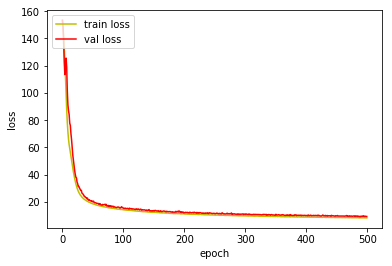

In [36]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(mod.history['loss'], 'y', label='train loss')
loss_ax.plot(mod.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

In [38]:
model.evaluate(valid_X, valid_Y, batch_size=10000)

243000/243000 [==============================] - 9s 36us/step


[9.378753410935893, 9.378752708435059]

In [39]:
model.evaluate(valid_X, valid_Y, batch_size=10000)

243000/243000 [==============================] - 16s 67us/step


[9.378753410935893, 9.378752708435059]

In [41]:
pred_test = model.predict(test_X)

In [42]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission.csv')

## With hyperparameter tuning

In [43]:
from keras import optimizers

In [60]:
def train_and_validate(num_layers,epoch,batch,learnrate):
    model = Sequential()
    model.add(Dense(units=160, input_dim=226, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    for i in range(int(num_layers)-1):
        model.add(Dense(units=160, kernel_initializer='he_normal'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
    model.add(Dense(units=4, kernel_initializer='he_normal', activation='linear'))
    
    adam=optimizers.Adam(lr=learnrate)
    model.compile(loss='mae', optimizer=adam, metrics=['accuracy'])
    
    mod=model.fit(train_X, train_Y, epochs=int(epoch), batch_size=int(batch), validation_split=0.1, verbose=2)
    
    score=model.evaluate(valid_X, valid_Y, batch_size=int(batch))
    print('Valid loss:',score[0])
    print('Valid accuracy:',score[1])
    
    return score[1]

In [62]:
from bayes_opt import BayesianOptimization

pb={'num_layers':(0,10),'epoch':(500,2000),'batch':(1000,10000),'learnrate':(1e-4, 1e-2)}

optimizer = BayesianOptimization(
    f=train_and_validate,
    pbounds=pb,
    random_state=0,
    verbose=2
)

optimizer.maximize(init_points=10,n_iter=30)

for i,res in enumerate(optimizer.res):
    print('Iteration {}: \n\t{}'.format(i,res))
print()
print()
print('Final result: ',optimizer.max)

|   iter    |  target   |   batch   |   epoch   | learnrate | num_la... |
-------------------------------------------------------------------------
Train on 510300 samples, validate on 56700 samples
Epoch 1/1572
 - 28s - loss: 120.3618 - accuracy: 0.2690 - val_loss: 137.8309 - val_accuracy: 0.2547
Epoch 2/1572
 - 26s - loss: 60.6834 - accuracy: 0.3211 - val_loss: 83.0253 - val_accuracy: 0.2526
Epoch 3/1572
 - 26s - loss: 46.2783 - accuracy: 0.4833 - val_loss: 82.2381 - val_accuracy: 0.3271
Epoch 4/1572
 - 27s - loss: 30.1542 - accuracy: 0.6967 - val_loss: 63.4381 - val_accuracy: 0.4071
Epoch 5/1572
 - 27s - loss: 21.5195 - accuracy: 0.7775 - val_loss: 49.0281 - val_accuracy: 0.4992
Epoch 6/1572
 - 27s - loss: 17.9361 - accuracy: 0.8104 - val_loss: 36.5983 - val_accuracy: 0.6487
Epoch 7/1572
 - 27s - loss: 15.7433 - accuracy: 0.8315 - val_loss: 28.2864 - val_accuracy: 0.7160
Epoch 8/1572
 - 26s - loss: 14.3287 - accuracy: 0.8464 - val_loss: 23.2371 - val_accuracy: 0.7635
Epoch 9/1572
 -

 - 34s - loss: 5.4239 - accuracy: 0.9366 - val_loss: 6.2811 - val_accuracy: 0.9241
Epoch 84/1572
 - 26s - loss: 5.3760 - accuracy: 0.9367 - val_loss: 6.1211 - val_accuracy: 0.9277
Epoch 85/1572
 - 26s - loss: 5.3185 - accuracy: 0.9368 - val_loss: 6.3837 - val_accuracy: 0.9325
Epoch 86/1572
 - 27s - loss: 5.3360 - accuracy: 0.9372 - val_loss: 6.5472 - val_accuracy: 0.9232
Epoch 87/1572
 - 26s - loss: 5.3582 - accuracy: 0.9365 - val_loss: 6.2954 - val_accuracy: 0.9357
Epoch 88/1572
 - 26s - loss: 5.3232 - accuracy: 0.9374 - val_loss: 6.3945 - val_accuracy: 0.9286
Epoch 89/1572
 - 27s - loss: 5.3368 - accuracy: 0.9370 - val_loss: 6.4011 - val_accuracy: 0.9159
Epoch 90/1572
 - 43s - loss: 5.2774 - accuracy: 0.9378 - val_loss: 6.4084 - val_accuracy: 0.9227
Epoch 91/1572
 - 42s - loss: 5.2790 - accuracy: 0.9381 - val_loss: 6.3127 - val_accuracy: 0.9312
Epoch 92/1572
 - 38s - loss: 5.2620 - accuracy: 0.9377 - val_loss: 6.1718 - val_accuracy: 0.9235
Epoch 93/1572
 - 27s - loss: 5.1816 - accura

KeyboardInterrupt: 